In [ ]:
!nvidia-smi

Tue Oct 25 13:35:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

import pathlib
import os
import random
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = zipfile.ZipFile('/content/drive/MyDrive/ramen_cake.zip')
files.extractall()
files.close()

In [ ]:
def display_image(dir, class_type):
  img_dir = dir + '/' + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')

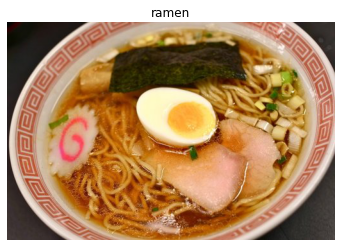

In [ ]:
display_image('ramen_cake', 'ramen')

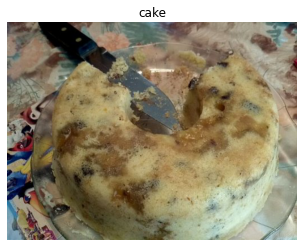

In [ ]:
display_image('ramen_cake', 'cake')

In [ ]:
data_dir = 'ramen_cake/'

training_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset='training',
                                                            batch_size=32,
                                                            image_size=(256,256),
                                                            seed=10)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                              validation_split=0.2,
                                                              subset='validation',
                                                              batch_size=32,
                                                              image_size=(256,256),
                                                              seed=10)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [ ]:
class_names = training_data.class_names
print(class_names)

['cake', 'ramen']


In [ ]:
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [ ]:
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[4.3382356e-01, 4.4117650e-01, 4.2107844e-01],
        [3.9411768e-01, 3.9019611e-01, 3.7058824e-01],
        [3.8137257e-01, 3.6764708e-01, 3.5196081e-01],
        ...,
        [1.9607844e-02, 3.5294119e-02, 3.9215688e-02],
        [3.1372551e-02, 4.7058828e-02, 5.8823533e-02],
        [2.1568628e-02, 3.7254903e-02, 4.9019612e-02]],

       [[4.5000002e-01, 4.5441180e-01, 4.3137258e-01],
        [4.0882355e-01, 4.0637258e-01, 3.8235298e-01],
        [3.8872552e-01, 3.7500003e-01, 3.5931376e-01],
        ...,
        [7.8431377e-03, 1.4705883e-02, 2.1568628e-02],
        [1.5196079e-02, 3.0882355e-02, 3.6764707e-02],
        [2.3039216e-02, 3.8725492e-02, 4.4607844e-02]],

       [[4.6127453e-01, 4.6421573e-01, 4.3578434e-01],
        [4.2745101e-01, 4.2009807e-01, 3.9019611e-01],
        [3.9852944e-01, 3.7892160e-01, 3.6225492e-01],
        ...,
        [1.9117648e-02, 2.3039216e-02, 3.0882355e-02],
        [9.8039219e-03

In [ ]:
len(training_data_norm), 1600/32

(50, 50.0)

In [ ]:
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
# Model Construction

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=2,
                    padding='valid'))
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D()) # sets the pool_size=(2,2), and padding='valid' by default
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compiling the model

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model

history = model.fit(training_data_norm,
          epochs=20,
          steps_per_epoch=len(training_data_norm),
          validation_data=validation_data_norm,
          validation_steps=(len(validation_data_norm)))

Epoch 1/20
50/50 [==============================] - 17s 117ms/step - loss: 0.5702 - accuracy: 0.7225 - val_loss: 0.3494 - val_accuracy: 0.8550
Epoch 2/20
50/50 [==============================] - 5s 91ms/step - loss: 0.3176 - accuracy: 0.8675 - val_loss: 0.2767 - val_accuracy: 0.8850
Epoch 3/20
50/50 [==============================] - 5s 97ms/step - loss: 0.2879 - accuracy: 0.8813 - val_loss: 0.2711 - val_accuracy: 0.9050
Epoch 4/20
50/50 [==============================] - 5s 91ms/step - loss: 0.2691 - accuracy: 0.8969 - val_loss: 0.2742 - val_accuracy: 0.8950
Epoch 5/20
50/50 [==============================] - 5s 99ms/step - loss: 0.2576 - accuracy: 0.9000 - val_loss: 0.2464 - val_accuracy: 0.9125
Epoch 6/20
50/50 [==============================] - 5s 98ms/step - loss: 0.2265 - accuracy: 0.9156 - val_loss: 0.2462 - val_accuracy: 0.9100
Epoch 7/20
50/50 [==============================] - 6s 110ms/step - loss: 0.2050 - accuracy: 0.9244 - val_loss: 0.2313 - val_accuracy: 0.9075
Epoch 8/20

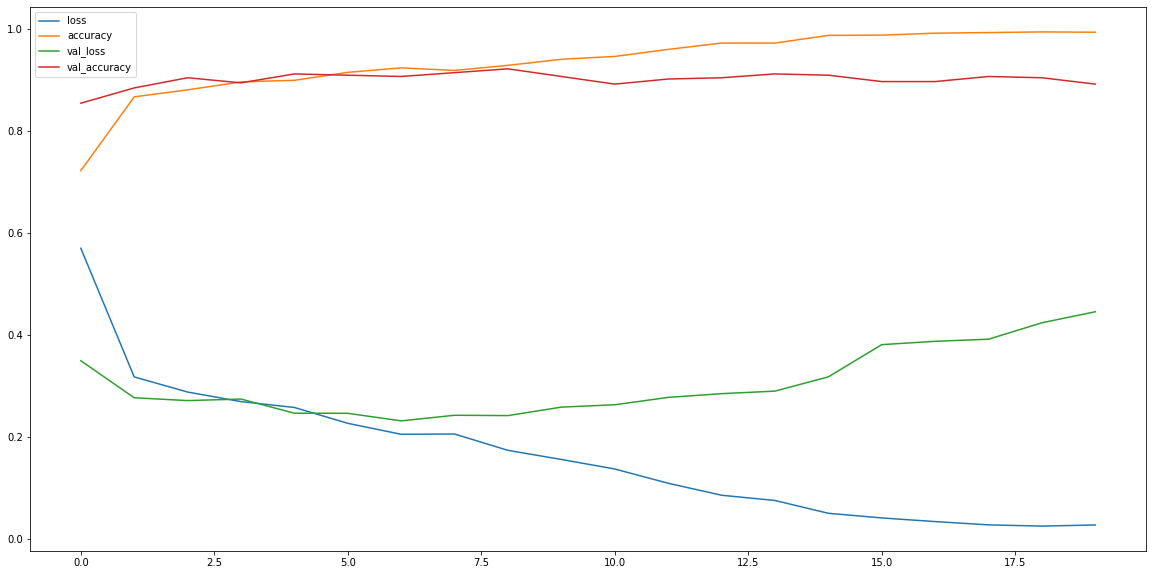

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20, 10))

# Result: This is a bad model because the validation accuracy is decreasing
# and the validation loss is increasing

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)      

In [ ]:
# Extracting filter shapes
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 3, 10)
conv2d_1 (3, 3, 10, 10)
conv2d_2 (3, 3, 10, 10)


In [ ]:
filters, bias = model.layers[0].get_weights()
filters.shape, bias.shape

((3, 3, 3, 10), (10,))

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
filters.ndim

4

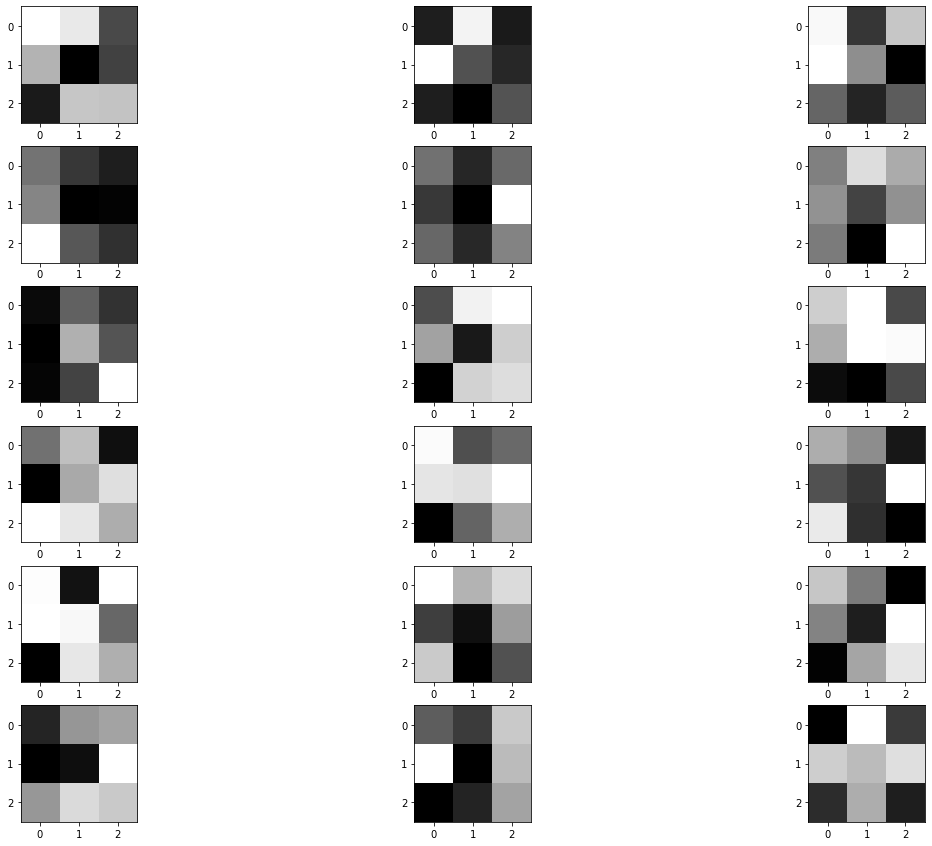

In [ ]:
n_filters = 6
ix = 1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix += 1
plt.show()